In [7]:
%matplotlib inline


In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
num_points = 2000
vectors_set = []

for i in xrange(num_points):
    if np.random.random() > 0.5:
        vectors_set.append([np.random.normal(0.0, 0.9),
                            np.random.normal(0.0, 0.9)])
    else:
        vectors_set.append([np.random.normal(3.0, 0.5),
                            np.random.normal(1.0, 0.5)])

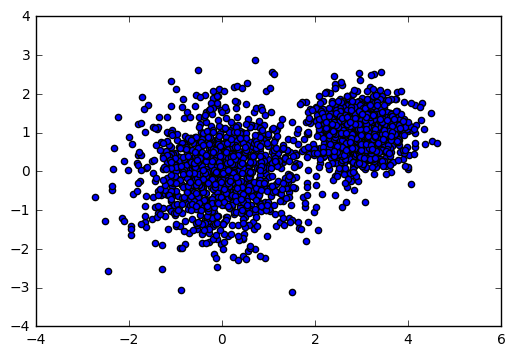

In [12]:
df = pd.DataFrame({"x": [v[0] for v in vectors_set],
                   "y": [v[1] for v in vectors_set]})
plt.scatter(df["x"], df["y"])

In [24]:
help(tf.Session.run)

Help on method run in module tensorflow.python.client.session:

run(self, fetches, feed_dict=None, options=None, run_metadata=None) unbound tensorflow.python.client.session.Session method
    Runs operations and evaluates tensors in `fetches`.
    
    This method runs one "step" of TensorFlow computation, by
    running the necessary graph fragment to execute every `Operation`
    and evaluate every `Tensor` in `fetches`, substituting the values in
    `feed_dict` for the corresponding input values.
    
    The `fetches` argument may be a single graph element, or an arbitrarily
    nested list, tuple, namedtuple, or dict containing graph elements at its
    leaves.  A graph element can be one of the following types:
    
    * An [`Operation`](../../api_docs/python/framework.md#Operation).
      The corresponding fetched value will be `None`.
    * A [`Tensor`](../../api_docs/python/framework.md#Tensor).
      The corresponding fetched value will be a numpy ndarray containing the
   

In [13]:
vectors = tf.constant(vectors_set)
print "vectors shape: ", vectors.get_shape()

k = 4
centroides = tf.Variable(tf.slice(tf.random_shuffle(vectors), [0, 0], [k, -1]))
print "centroides shape: ", centroides.get_shape()

# vecotrs와 centroides의 차원을 맞춰서 broadcasting으로 뺄셈이 가능하게 만들어주기 위함.
# 각각 아래와 같이 확장하면, 0차원은 클러스터, 1차원은 원소의 원래 index, 2차원은 (x, y) 값이 된다.
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroides = tf.expand_dims(centroides, 1)

# vector들과 현재의 centroides와의 거리를 구한 후, 가장 가까운 centroides에 할당.
assignments = tf.argmin(tf.reduce_sum(tf.square(tf.sub(expanded_vectors, expanded_centroides)), 2), 0)

# 특정 클러스터(c)에 속하는 vector들만 가져다가 평균을 구해서 새로운 centroides를 만든다.
means = tf.concat(0, [tf.reduce_mean(tf.gather(vectors, tf.reshape(tf.where(tf.equal(assignments, c)), [1, -1])),
                                     reduction_indices=[1])
                      for c in xrange(k)])

update_centroides = tf.assign(centroides, means)

init_op = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init_op)

for step in xrange(100):
    _, centroid_values, assignment_values = sess.run([update_centroides, centroides, assignments])

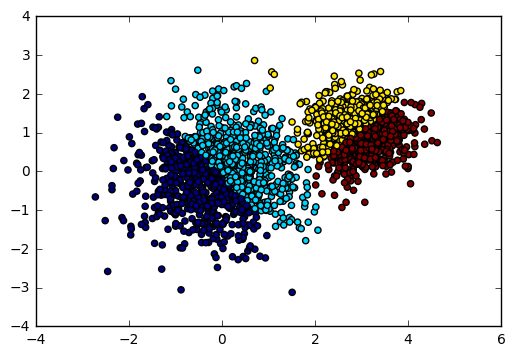

In [14]:
data = {"x": [], "y": [], "cluster": []}

for i in xrange(len(assignment_values)):
    data["x"].append(vectors_set[i][0])
    data["y"].append(vectors_set[i][1])
    data["cluster"].append(assignment_values[i])
    
df = pd.DataFrame(data)
plt.scatter(df["x"], df["y"], c=df["cluster"])